# 캐글 - Rossmann Store Sales

## https://www.kaggle.com/competitions/rossmann-store-sales/overview

### Rossmann 상점 매출 예측

### 데이터 설명

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


- customers 칼럼 삭제

In [4]:
train = train.drop(['Customers'], axis = 1)
train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,1,0,1
1,2,5,2015-07-31,6064,1,1,0,1
2,3,5,2015-07-31,8314,1,1,0,1
3,4,5,2015-07-31,13995,1,1,0,1
4,5,5,2015-07-31,4822,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


- Id 칼럼 삭제

In [6]:
ID = test['Id']
test = test.drop(['Id'], axis = 1)
test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,1.0,1,0,0
1,3,4,2015-09-17,1.0,1,0,0
2,7,4,2015-09-17,1.0,1,0,0
3,8,4,2015-09-17,1.0,1,0,0
4,9,4,2015-09-17,1.0,1,0,0


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 62.1+ MB


- Date칼럼 datetime으로 변환 필요
- StateHoliday칼럼 원핫 인코딩 필요

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.2+ MB


- Date 칼럼 datetime으로 변환 필요
- StateHoliday 칼럼 원핫 인코딩 필요

In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## 1. StateHoliday 칼럼 one hot encoding

In [11]:
train['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [12]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [13]:
train['StateHoliday'] = train['StateHoliday'].replace(0, '0')

In [14]:
train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [15]:
test['StateHoliday'].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

In [16]:
train  = pd.get_dummies(columns = ['StateHoliday'], data = train)
test = pd.get_dummies(columns = ['StateHoliday'], data = test)

In [17]:
train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,1,1,1,1,0,0,0
1,2,5,2015-07-31,6064,1,1,1,1,0,0,0
2,3,5,2015-07-31,8314,1,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1,1,1,1,0,0,0
4,5,5,2015-07-31,4822,1,1,1,1,0,0,0


- Sales: 매출
- Promo: 프로모션 여부
- SchoolHoliday: 학교 휴일 여부
- StateHoliday: 공휴일 여부

In [18]:
test.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,1,4,2015-09-17,1.0,1,0,1,0
1,3,4,2015-09-17,1.0,1,0,1,0
2,7,4,2015-09-17,1.0,1,0,1,0
3,8,4,2015-09-17,1.0,1,0,1,0
4,9,4,2015-09-17,1.0,1,0,1,0


In [19]:
# test 데이터에는 StateHoliday가 b, c인 경우가 없으므로
# one hot encoding에서도 b, c 변수가 생성되지 않음
# 학습 시에 train, test 데이터에 동일한 칼럼이 없을 경우 문제가 생길 수 있으므로
# test 데이터에도 해당 칼럼 생성

test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [20]:
test.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,4,2015-09-17,1.0,1,0,1,0,0,0
1,3,4,2015-09-17,1.0,1,0,1,0,0,0
2,7,4,2015-09-17,1.0,1,0,1,0,0,0
3,8,4,2015-09-17,1.0,1,0,1,0,0,0
4,9,4,2015-09-17,1.0,1,0,1,0,0,0


## 2. Date 칼럼 변환

In [21]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [22]:
# 파생변수 생성(요일, 년도, 월)

train['weekday'] = train['Date'].dt.weekday     # dt.dayofweek와 같음
test['weekday'] = test['Date'].dt.weekday

train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [23]:
train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,1,5,2015-07-31,5263,1,1,1,1,0,0,0,4,2015,7
1,2,5,2015-07-31,6064,1,1,1,1,0,0,0,4,2015,7
2,3,5,2015-07-31,8314,1,1,1,1,0,0,0,4,2015,7
3,4,5,2015-07-31,13995,1,1,1,1,0,0,0,4,2015,7
4,5,5,2015-07-31,4822,1,1,1,1,0,0,0,4,2015,7


In [24]:
train[['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 
       'StateHoliday_c', 'weekday', 'year', 'month']]

,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,5,1,1,1,1,0,0,0,4,2015,7
1,5,1,1,1,1,0,0,0,4,2015,7
2,5,1,1,1,1,0,0,0,4,2015,7
3,5,1,1,1,1,0,0,0,4,2015,7
4,5,1,1,1,1,0,0,0,4,2015,7
...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,1,0,1,0,0,1,2013,1
1017205,2,0,0,1,0,1,0,0,1,2013,1
1017206,2,0,0,1,0,1,0,0,1,2013,1
1017207,2,0,0,1,0,1,0,0,1,2013,1


## 3. 베이스라인 모델링

In [25]:
from xgboost import XGBRegressor

In [26]:
# 모델 학습

xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1, random_state = 2022)
xgb.fit(train[['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 
       'StateHoliday_c', 'weekday', 'year', 'month']],
       train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2022, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
# test 데이터에 대하여 예측

test['Sales'] = xgb.predict(test[['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 
                                  'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
                                  'StateHoliday_c', 'weekday', 'year', 'month']])

In [28]:
# 예측된 값을 submission.csv로 만들어서 1차 제출

pd.concat([ID, test['Sales']], axis = 1).to_csv('submission.csv', index = False)

- 베이스라인으로 1차 제출
- XGBRegressor 사용
- 변수: 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'weekday', 'year', 'month'
- 제출결과: score: 0.43599(숫자가 작을수록 좋음)

## 4. 변수선택

In [29]:
# 변수중요도 확인

xgb.feature_importances_

array([1.51901683e-02, 8.21832955e-01, 1.37860700e-01, 4.25608689e-03,
       4.40772437e-03, 4.59661329e-04, 2.67878571e-03, 2.52931804e-05,
       0.00000000e+00, 3.09286127e-03, 1.01957945e-02], dtype=float32)

In [30]:
input_var = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 
             'StateHoliday_c', 'weekday', 'year', 'month']
imp_df = pd.DataFrame({'var' : input_var,
                      'imp' : xgb.feature_importances_})

In [31]:
# 중요한 변수 순서대로 정렬

imp_df = imp_df.sort_values(['imp'], ascending = False)

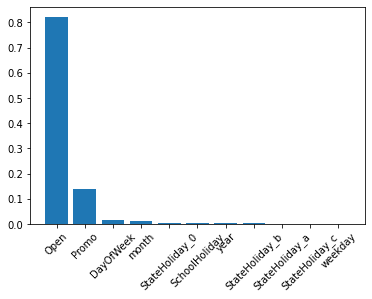

In [32]:
# 변수중요도 시각화

plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation = 45)
plt.show()

In [33]:
# cross validation 함수로 모델 성능 확인

from sklearn.model_selection import cross_val_score

cross_val_score(xgb, train[input_var], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)

array([-6803265.53133975, -6671810.9443075 , -6229093.9596721 ])

- 절대값 숫자가 작을수록 좋음

In [34]:
# 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation 실행
## cross validation 결과를 score_list에 저장

score_list = []
selected_varnum = []

for i in range(1, 11):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb,
                            train[selected_var], train['Sales'],
                            scoring = 'neg_mean_squared_error', cv = 3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)

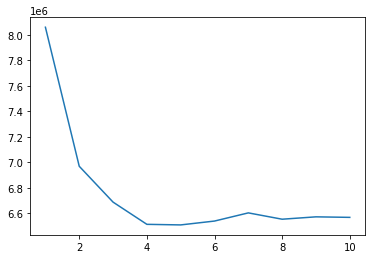

In [35]:
# 선택 변수에 따른 cross validation 결과를 시각화

plt.plot(selected_varnum, score_list)

- 4개의 변수를 활용하는 것이 cross validation 결과가 가장 좋음

In [36]:
# 변수 재설정해서 다시 제출

xgb.fit(train[['DayOfWeek', 'Open', 'Promo', 'month']],
       train['Sales'])
test['Sales'] = xgb.predict(test[['DayOfWeek', 'Open', 'Promo', 'month']])

# 예측된 값을 submission.csv로 만들어서 2차 제출
pd.concat([ID, test['Sales']], axis = 1).to_csv('submission1.csv', index = False)

- 2차 제출
- XGBRegressor 사용
- 변수: 'DayOfWeek', 'Open', 'Promo', 'month'
- 제출결과: score: 0.40960

## 5. store 데이터 활용

In [37]:
# store 데이터 merge

train = pd.merge(train, store, on = ['Store'], how = 'left')
test = pd.merge(test, store, on = ['Store'], how = 'left')

In [38]:
# 경쟁업체가 몇 개월 전에 개장했는지 여부를 파생변수로 생성

train['CompetitionOpen'] = 12 * (train['year'] - train['CompetitionOpenSinceYear'])+\
                            (train['month'] - train['CompetitionOpenSinceMonth'])

test['CompetitionOpen'] = 12 * (test['year'] - test['CompetitionOpenSinceYear'])+\
                            (test['month'] - test['CompetitionOpenSinceMonth'])

In [39]:
# 몇번째 주

train['WeekOfYear'] = train['Date'].dt.weekofyear
test['WeekOfYear'] = test['Date'].dt.weekofyear

In [40]:
# 프로모션이 시작된지 몇개월 되었는지 파생변수 생성

train['PromoOpen'] = 12 * (train['year'] - train['Promo2SinceYear'])+\
                        (train['WeekOfYear'] - train['Promo2SinceWeek']) / 4

test['PromoOpen'] = 12 * (test['year'] - test['Promo2SinceYear'])+\
                        (test['WeekOfYear'] - test['Promo2SinceWeek']) / 4

In [41]:
# StoreType 변수 one hot encoding

train = pd.get_dummies(columns = ['StoreType'], data = train)
test = pd.get_dummies(columns = ['StoreType'], data = test)

In [42]:
train['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [43]:
# Assortment 변수 one hot encoding

train = pd.get_dummies(columns = ['Assortment'], data = train)
test = pd.get_dummies(columns = ['Assortment'], data = test)

In [44]:
train['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [45]:
# PromoInterval 변수 one hot encoding

train = pd.get_dummies(columns = ['PromoInterval'], data = train)
test = pd.get_dummies(columns = ['PromoInterval'], data = test)

In [46]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [47]:
test.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'Sales', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

- train, test 칼럼 동일한지 확인

## 6. 2차 모델링

In [48]:
# input 변수 지정

input_var = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [49]:
# 지정한 input 변수로 xgb 모델 학습

xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1, random_state = 2022)
xgb.fit(train[input_var], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2022, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
# 변수중요도

imp_df = pd.DataFrame({'var' : input_var,
                      'imp' : xgb.feature_importances_})
imp_df = imp_df.sort_values(['imp'], ascending = False)

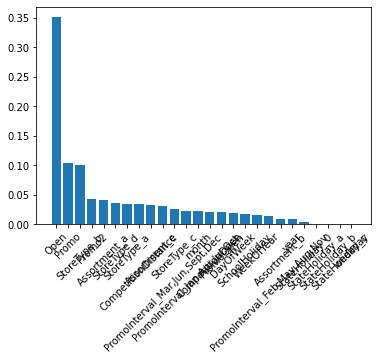

In [51]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation = 45)
plt.show()

In [52]:
# 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation 실행
## cross validation을 score_list에 저장

score_list = []
selected_varnum = []

for i in range(1, 27):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb,
                            train[selected_var], train['Sales'],
                            scoring = 'neg_mean_squared_error', cv = 3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)

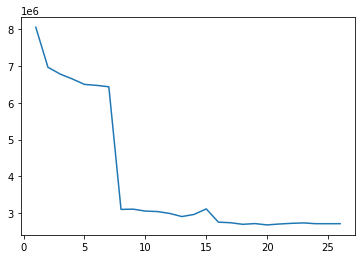

In [53]:
# cross validation 시각화

plt.plot(selected_varnum, score_list)

- 16개의 변수를 선택

In [54]:
# 최적이라고 나온 16개의 변수를 선택

input_var = imp_df['var'].iloc[:16].tolist()

In [55]:
# 성능확인

cross_val_score(xgb, train[input_var], train['Sales'],
               scoring = 'neg_mean_squared_error', cv = 3)

array([-3074192.71858741, -2593771.15092604, -2590450.69845252])

In [56]:
# 다시 모델 학습

xgb.fit(train[input_var], train['Sales'])
test['Sales'] = xgb.predict(test[input_var])

# 3차 제출
pd.concat([ID, test['Sales']], axis = 1).to_csv('submission2.csv', index = False)

- 3차 제출
- XGBRegressor 사용
- 변수:'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',        'weekday', 'year', 'month', 'CompetitionDistance', 'Promo2', 'CompetitionOpen', 'WeekOfYear', 'PromoOpen'
- 제출결과: score: 0.23084

## 7. 파라미터 튜닝

In [57]:
# n_estimators 파라미터를 최적화시키는 작업 진행

estim_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
score_list = []

for i in estim_list:
    xgb = XGBRegressor(n_estimators = i, learning_rate = 0.1, random_state = 2022)
    scores = cross_val_score(xgb, train[input_var], train['Sales'],
                            scoring = 'neg_mean_squared_error', cv = 3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


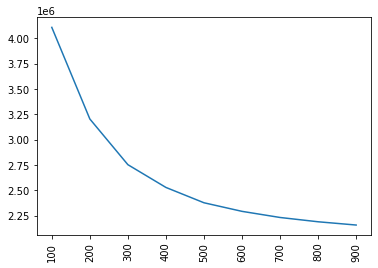

In [59]:
plt.plot(estim_list, score_list)
plt.xticks(rotation = 90)
plt.show()

In [62]:
xgb = XGBRegressor(n_estimators = 800, learning_rate = 0.1, random_state = 2022)

In [63]:
xgb.fit(train[input_var], train['Sales'])
test['Sales'] = xgb.predict(test[input_var])

# 4차 제출
pd.concat([ID, test['Sales']], axis = 1).to_csv('submission3.csv', index = False)

- 4차 제출
- XGBRegressor 사용
- 변수:'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'weekday', 'year', 'month', 'CompetitionDistance', 'Promo2', 'CompetitionOpen', 'WeekOfYear', 'PromoOpen'
- n_estimators 800으로 바꿈
- 제출결과: score: 0.18957